In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
cd '/gdrive/My Drive/Google Colab Import'

/gdrive/My Drive/Google Colab Import


In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
     |████████████████████████████████| 3.8MB 39.6MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import os
import tensorflow as tf
import NTM_Model
import utilities
import numpy as np

## Training

In [0]:
tf.__version__

'2.0.0'

In [0]:
output_dim = 8
timesteps = 6
batch_size = 10

model = NTM_Model.NTM_CopyTask_Model(batch_size,output_dim+2,120,128,20,1,1)

sequence_loss_func = NTM_Model.CE_Loss_Function()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
model.load_weights('TRAINING WEIGHTS 2nd Round/Weight_Start_CEL_End_CEL_2') #Training From Scratch

In [0]:
all_training_predictions = []
all_test_predictions = []
logdir = 'MODEL_INFO/MODELGRAPH'
writer = tf.summary.create_file_writer(logdir)

for i in range(10001):
    seq_length = (np.random.randint(1, 20 + 1))
    inputs, outputs = utilities.Input_Generator(output_dim,seq_length,batch_size)
    
    print("Epoch: {}".format(i))
    print("Seq_length: {}".format(seq_length))
    
    
    with tf.GradientTape() as tape:
        #tf.summary.trace_on(graph=True, profiler=True)
        
        y_pred, state = model(inputs)
        loss = sequence_loss_func(y_true=outputs, y_pred=y_pred)

        #with writer.as_default():
        #  tf.summary.trace_export(  name="ModelGraph",step=0,profiler_outdir=logdir)


        

        print("Loss at epoch {}: {}".format(i, loss))
        #plt.imshow(tf.transpose(y_pred[0]),cmap = plt.cm.binary_r)
        print("*********************************")
        

        #loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

    if i%100 == 0:

          all_training_predictions.append([inputs,y_pred,state])

          tf.saved_model.save(model,'Model Variants/2nd Round/Model_Start_CEL_End_CEL_4')  #1e6 for delta = 1e-6
          model.save_weights('TRAINING WEIGHTS 2nd Round/Weight_Start_CEL_End_CEL_4')

          #Deliberately testing it on more than what it is trained for

          test_seq_length = (np.random.randint(21, 92))
          inputs, outputs = utilities.Input_Generator(output_dim,test_seq_length,batch_size)
          y_pred, state = model(inputs)
          print('Test Sequence Length: ', test_seq_length)
          test_loss = sequence_loss_func(y_true=outputs, y_pred=y_pred)
          print('Test Loss CEL: ', test_loss)
          all_test_predictions.append([inputs, y_pred, state])

          np.save('Results/Start CEL to end CEL 4/ALL_TEST_PREDICTIONS' ,np.array(all_test_predictions))
          np.save('Results/Start CEL to end CEL 4/ALL_TRAINING_PREDICTIONS', np.array(all_training_predictions) )
          

          


    #plt.imshow(tf.transpose(y_pred[0]),cmap = plt.cm.binary_r)

Epoch: 0
Seq_length: 5
Loss at epoch 0: 0.010625447146594524
*********************************
INFO:tensorflow:Assets written to: Model Variants/2nd Round/Model_Start_CEL_End_CEL_4/assets
Test Sequence Length:  68
Test Loss CEL:  tf.Tensor(0.010459824, shape=(), dtype=float32)
Epoch: 1
Seq_length: 12
Loss at epoch 1: 0.012191955000162125
*********************************
Epoch: 2
Seq_length: 7
Loss at epoch 2: 0.010779564268887043
*********************************
Epoch: 3
Seq_length: 10
Loss at epoch 3: 0.009121526964008808
*********************************
Epoch: 4
Seq_length: 14
Loss at epoch 4: 0.010826241225004196
*********************************
Epoch: 5
Seq_length: 6
Loss at epoch 5: 0.01351964008063078
*********************************
Epoch: 6
Seq_length: 2
Loss at epoch 6: 0.011703602969646454
*********************************
Epoch: 7
Seq_length: 19
Loss at epoch 7: 0.010059848427772522
*********************************
Epoch: 8
Seq_length: 7
Loss at epoch 8: 0.011433803476

In [0]:
model.save_weights('TRAINING WEIGHTS/NTM_Model_till_epoch_{}'.format(i+1)) #First save after 1000 epochs

In [0]:
for i in range(100000):
    seq_length = (np.random.randint(1, 20 + 1))
    inputs, outputs = utilities.Input_Generator(output_dim,seq_length,batch_size)
    
    print("Epoch: {}".format(i))
    print("Seq_length: {}".format(seq_length))
    
    with tf.GradientTape() as tape:
        #tf.summary.trace_on(graph=True, profiler=True)

        y_pred, state = model(inputs)
        loss = sequence_loss_func(y_true=outputs, y_pred=y_pred)
        print("Loss at epoch {}: {}".format(i, loss))
        plt.imshow(tf.transpose(y_pred[0]),cmap = plt.cm.binary_r)
        print("*********************************")
        #loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
    if i%10000 == 0:
      model.save_weights('TRAINING WEIGHTS/NTM_Model_till_epoch_{}'.format(i+1000)) #+1000 as we have already trained it for 1000 epochs, atleast furing this instance

Epoch: 0
Seq_length: 13
Loss at epoch 0: 0.5572142601013184
*********************************
Epoch: 1
Seq_length: 5
Loss at epoch 1: 0.5501739978790283
*********************************
Epoch: 2
Seq_length: 10
Loss at epoch 2: 0.5591036677360535
*********************************
Epoch: 3
Seq_length: 8
Loss at epoch 3: 0.5613510012626648
*********************************
Epoch: 4
Seq_length: 19
Loss at epoch 4: 0.5611886382102966
*********************************
Epoch: 5
Seq_length: 9
Loss at epoch 5: 0.5576871633529663
*********************************
Epoch: 6
Seq_length: 19
Loss at epoch 6: 0.5611687302589417
*********************************
Epoch: 7
Seq_length: 17
Loss at epoch 7: 0.5612754225730896
*********************************
Epoch: 8
Seq_length: 20
Loss at epoch 8: 0.5598131418228149
*********************************
Epoch: 9
Seq_length: 7
Loss at epoch 9: 0.554182231426239
*********************************
Epoch: 10
Seq_length: 17
Loss at epoch 10: 0.5623419284820557
***

## Testing

In [0]:
import matplotlib.pyplot as plt

Note we are testing it on 24 timesteps (something that it never saw during training), after 1000 epochs, it understood that bottom line of the sheet will be empty as it's a delimeter, same goes for start of file delimeter!!

In [0]:
inputs, outputs = utilities.Input_Generator(output_dim,11,batch_size)
y_pred = model(inputs)

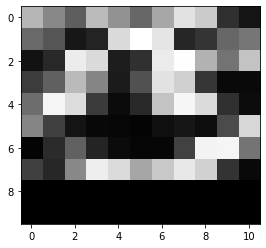

In [0]:
plt.imshow(tf.transpose(y_pred[0][0]),cmap = plt.cm.binary_r)

The above image represents the model output on loss of 0.542 on Huber Loss

## Original Image

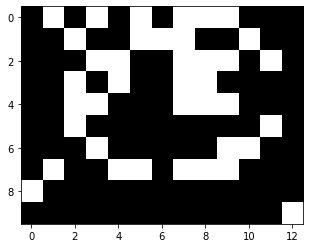

In [0]:
plt.imshow(tf.transpose(inputs[0]),cmap = plt.cm.binary_r)

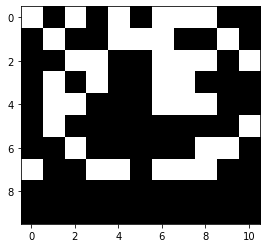

In [0]:
plt.imshow(tf.transpose(outputs[0]),cmap = plt.cm.binary_r)

In [0]:
model.save?#('NTM_Model_till_epoch_{}'.format(i+1))

SyntaxError: ignored

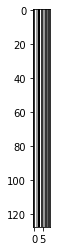

In [0]:
plt.imshow(tf.transpose(y_pred[1]['All_Weight_vectors'][0]),cmap = plt.cm.binary_r)

# Loading Weights till 10000 epochs

In [0]:
import matplotlib.pyplot as plt


In [0]:
model.load_weights('TRAINING WEIGHTS/NTM_Model')

In [0]:
inputs, outputs = utilities.Input_Generator(output_dim,11,batch_size)
y_pred = model(inputs)

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


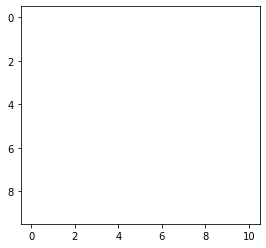

In [0]:
plt.imshow(tf.transpose(y_pred[0][0]),cmap = plt.cm.binary_r)

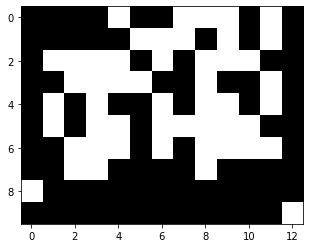

In [0]:
plt.imshow(tf.transpose(inputs[0]),cmap = plt.cm.binary_r)

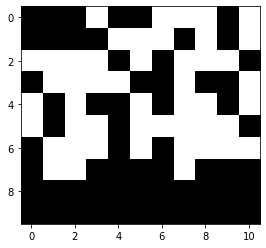

In [0]:
plt.imshow(tf.transpose(outputs[0]),cmap = plt.cm.binary_r)

# Loading PreTrained Model

In [0]:
loaded_model = tf.saved_model.load('COMPLETE_MODEL_HUBER_5')

In [0]:
inputs, outputs = utilities.Input_Generator(output_dim,20,batch_size)
y_pred = loaded_model.call(inputs)

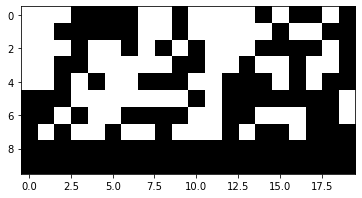

In [0]:
plt.imshow(tf.transpose(outputs[0]),cmap = plt.cm.binary_r)

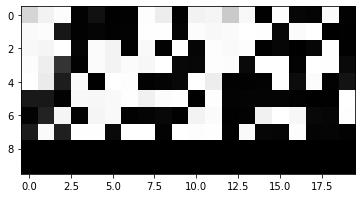

In [0]:
plt.imshow(tf.transpose(y_pred[0][0]),cmap = plt.cm.binary_r)

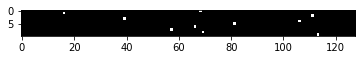

In [0]:
plt.imshow((y_pred[1]['All_Weight_vectors'][0]),cmap = plt.cm.binary_r)

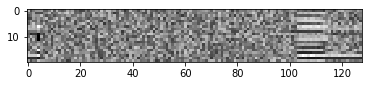

In [0]:
plt.imshow(tf.transpose(y_pred[1]['Memory_Matrix'][9]),cmap = plt.cm.binary_r)

In [0]:
model.save('MODEL_SAVED')

ValueError: ignored

In [0]:
inputs, outputs = utilities.Input_Generator(output_dim,25,batch_size)

In [0]:
model._set_inputs(inputs)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [0]:
model.save('SAVED_MODEL')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: SAVED_MODEL/assets


In [0]:
loaded_model = tf.keras.models.load_model('SAVED_MODEL')

ValueError: ignored